In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [2]:
zip_lon_lat = pd.read_csv('pa_zip-lon-lat.csv')
zip_lon_lat.head()

,Unnamed: 0,zip_code,latitude,longitude
0,0,16914,41.854230,-76.783664
1,1,16925,41.948556,-76.783808
2,3,18013,40.848762,-75.177293
3,45,18077,40.570065,-75.237114
4,102,18301,41.042703,-75.175581


In [3]:
features = ["latitude","longitude"]
X = zip_lon_lat[features]
number_of_counties = 67

In [4]:
kmeans = KMeans( init="random", n_clusters=number_of_counties,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

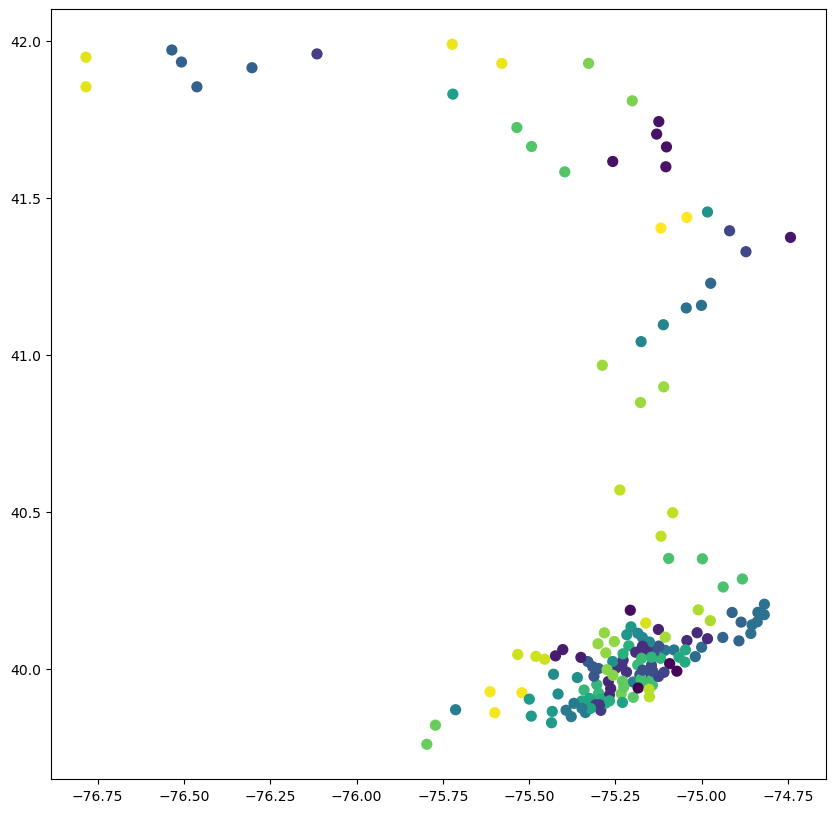

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X["longitude"], X["latitude"], c=y_kmeans, s=50, cmap='viridis')

In [6]:
zip_lon_lat['county'] = y_kmeans.tolist()
zip_lon_lat.head()

,Unnamed: 0,zip_code,latitude,longitude,county
0,0,16914,41.854230,-76.783664,63
1,1,16925,41.948556,-76.783808,63
2,3,18013,40.848762,-75.177293,56
3,45,18077,40.570065,-75.237114,60
4,102,18301,41.042703,-75.175581,30


In [7]:
zip_lon_lat.to_csv('county.csv')

In [8]:
zip_lon_lat.groupby(['county'])['county'].count()

county
0     1
1     2
2     1
3     5
4     1
     ..
62    1
63    2
64    2
65    3
66    2
Name: county, Length: 67, dtype: int64

In [9]:
outliers_df = pd.read_csv('outliers.csv')
outliers_df.drop(columns=["Unnamed: 0"],inplace=True)
#outliers_df.head()

In [10]:
merged_df = pd.merge(outliers_df, zip_lon_lat, how='inner', on="zip_code")
merged_df.tail()

,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,Unnamed: 0,latitude,longitude,county
2348,3.0,3.0,2.75,18470.0,1913.0,2020-09-08,349999.0,187,41.724706,-75.535516,48
2349,3.0,2.0,4.55,18470.0,1152.0,2021-03-23,59000.0,187,41.724706,-75.535516,48
2350,2.0,2.0,0.05,18421.0,1946.0,2022-02-25,85000.0,149,41.664210,-75.492886,48
2351,2.0,1.0,0.17,18472.0,471.0,2021-08-31,98500.0,189,41.583410,-75.396687,48
2352,3.0,2.0,0.21,18821.0,1175.0,2020-12-28,114500.0,253,41.989756,-75.722751,64


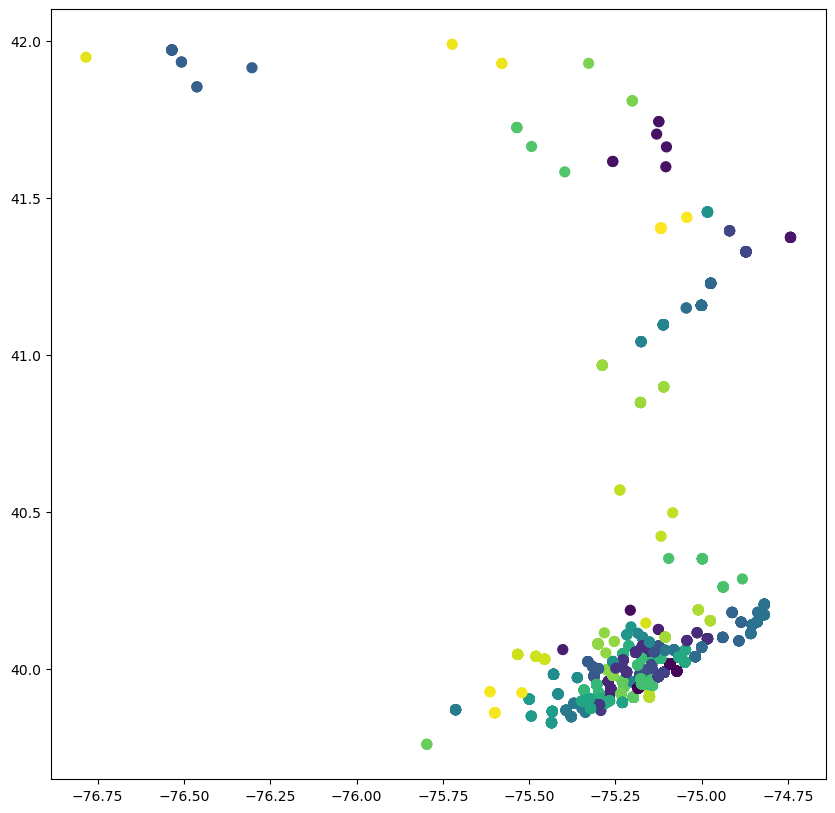

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(merged_df["longitude"],merged_df["latitude"], c=merged_df["county"], s=50, cmap='viridis')

In [12]:
outliers_df.groupby(["zip_code"])["zip_code"].count()

zip_code
16925.0     1
18013.0     7
18077.0     2
18301.0     5
18302.0    22
           ..
19355.0     7
19382.0     2
19428.0    23
19444.0     2
19462.0     1
Name: zip_code, Length: 156, dtype: int64